<a href="https://colab.research.google.com/github/ffclemente/Projeto-Pesquisas-CITs-2021-22/blob/main/PROJETO_PESQUISAS_CITS_2021_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PROJETO DE ANÁLISE DOS DADOS DAS PESQUISAS APLICADAS COM TURISTAS NAS CENTRAIS DE INFORMAÇÃO TURÍSTICA DA CIDADE DE SÃO PAULO (CITS) ENTRE 2021 E 2022.
# Resultado do Trabalho de Conclusão de Curso em MBA em Data Science Analytics (ESALQ/USP, 2023).
# Título do trabalho: A Satifação dos visitantes das Centrais de Informação Turística da cidade de São Paulo: uma análise das pesquisas aplicadas entre 2021 e 2022.
# Autor: Fernando Fernandes Clemente
# Fonte dos dados: VMO TURISMO empresa terceirizada/ SECRETARIA MUNICIPAL DE TURISMO / PREFEITURA DE SÃO PAULO, 2023.

# Link da Base de dados: https://github.com/ffclemente/Projeto-Pesquisas-CITs-2021-22

# Carregar arquivo
from google.colab import files
uploaded = files.upload()

Saving PROJETO PESQUISAS CITS 2021-22.xlsx to PROJETO PESQUISAS CITS 2021-22.xlsx


In [2]:
# Carregar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

caminho_local = 'PROJETO PESQUISAS CITS 2021-22.xlsx'

# Carregar o arquivo Excel
dados = pd.read_excel(caminho_local)

# Exibir as primeiras 50 linhas
dados.head(50)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Carimbo de data/hora,CIT,Data,1. Data de chegada à São Paulo - Fecha de llegada - arrival date,2. Data de saída de São Paulo - Fechada de salida - departure date,3. País de Residência/Pais de residencia/ Country of residence,4. Estado de Residência/Provincia de Residencia/State of residence,5. Cidade de Residência/ciudad de residencia/city of residence,6. Gênero/Género/Gender,4. Estado de residência,...,Caso tenha algum atrativo turístico que não tenha na lista digite aqui:,15. Como tomou conhecimento sobre a Central de Informação Turística/¿ Cómo ha encontrado la Central de Información Turística/How have you found the Tourist Information Center?,16. Conhece outra unidade da Central de Informação Turística/¿Conoce otra unidad de la Central de Informacíon/Do you know any other Tourist Information?,17. Avalie a Central de Informação Turística/Evalué la Central de Informacíon Turística/Evaluate the touristic information center: [Atendimento pessoal],17. Avalie a Central de Informação Turística/Evalué la Central de Informacíon Turística/Evaluate the touristic information center: [Serviços oferecidos],17. Avalie a Central de Informação Turística/Evalué la Central de Informacíon Turística/Evaluate the touristic information center: [Localização],17. Avalie a Central de Informação Turística/Evalué la Central de Informacíon Turística/Evaluate the touristic information center: [Materiais virtuais (QR code)],18. Comentários e sugestões/Comentarios y sugerencias/ Comments and Suggestions:,Unnamed: 313,Unnamed: 314
0,2021-01-05 09:21:46.161,CIT Congonhas,2021-01-05,2021-01-05,2021-01-05,Brasil,NaN,NaN,NaN,São Paulo,...,Museu do Ipiranga e Cidade Universitária,Abordagem no aeroporto,CIT República,Ótimo/excelente,Bom,Bom,Bom,É preciso melhorar a manutenção de áreas públi...,NaN,NaN
1,2021-01-05 09:26:42.282,CIT Congonhas,2021-01-05,2021-01-05,2021-01-05,Brasil,NaN,NaN,NaN,São Paulo,...,Não se aplica,Abordagem pelo local,Não,Bom,Bom,Bom,Bom,"Não costumo passear na cidade. Quando venho, é...",NaN,NaN
2,2021-01-05 09:37:24.373,CIT Congonhas,2021-01-05,2021-01-05,2021-01-05,Brasil,NaN,NaN,NaN,São Paulo,...,Expresso turístico (CPTM) - pretende visitar. ...,Abordagem no aeroporto,Não,Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,Bom,Amei um roteiro de turismo religioso que fiz n...,NaN,NaN
3,2021-01-06 08:05:46.667,CIT Guarulhos,2021-01-04,2021-01-04,2021-01-04,Brasil,NaN,NaN,NaN,Pernambuco,...,Não se aplica,Passagem pelo local,Não,Ótimo/excelente,Ótimo/excelente,Ruim,Bom,NaN,NaN,NaN
4,2021-01-06 11:03:46.236,CIT Congonhas,2021-01-06,2021-01-06,2021-01-11,Brasil,NaN,NaN,NaN,Minas Gerais,...,Palácio dos Bandeirantes / Restaurante Temátic...,Passagem pelo local,Não,Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,NaN,NaN,NaN
5,2021-01-06 13:42:28.861,CIT Guarulhos,2021-01-06,2021-01-06,2021-01-06,Brasil,NaN,NaN,NaN,Espírito Santo,...,Não se aplica,Passagem pelo local,Não,Ótimo/excelente,Ótimo/excelente,Bom,Ótimo/excelente,NaN,NaN,NaN
6,2021-01-06 13:43:16.961,CIT República,2020-01-06,2020-12-07,2021-01-01,Venezuela,Caracas - DF,NaN,Masculino,NaN,...,Aphavile,Passagem pelo local,Não,Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,NaN,NaN,NaN
7,2021-01-08 15:19:52.193,CIT Congonhas,2021-01-08,2021-01-08,2021-01-10,Brasil,NaN,NaN,NaN,Santa Catarina,...,Não se aplica,"Guias ou folheterias, Passagem pelo local","CIT Paulista, CIT Tietê",Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,Ótimo/excelente,NaN,NaN,NaN
8,2021-01-08 16:26:34.706,CIT Tietê,2021-01-08,2021-01-08,2021-01-10,Brasil,NaN,NaN,NaN,Rio de Janeiro,...,NaN,Passagem pelo local,CIT Tietê,Ótimo/excelente,Bom,Ótimo/excelente,Ótimo/excelente,Seria interessante uma plataforma que tivesse ...,NaN,NaN
9,2021-01-09 10:26:58.242,CIT República,2020-01-09,2020-01-04,2020-01-10,Brasil,NaN,NaN,NaN,Amazonas,...,Holambra,Passagem pelo local,Não,Ótimo/excelente,Bom,Ótimo/excelente,Ótimo/excelente,"""Referente as Praças de São Paulo, eu achei mu...",NaN,NaN


Tabela de Frequências:
             CIT  Frequência  Frequência Relativa (%)  Frequência Cumulativa
0  CIT Congonhas        1228                25.143325                   1228
1  CIT Guarulhos         988                20.229320                   2216
4   CIT Paulista         871                17.833743                   3087
2  CIT República         922                18.877969                   4009
3      CIT Tietê         874                17.895168                   4883

Estatísticas:
count              4883
unique                5
top       CIT Congonhas
freq               1228
Name: CIT, dtype: object


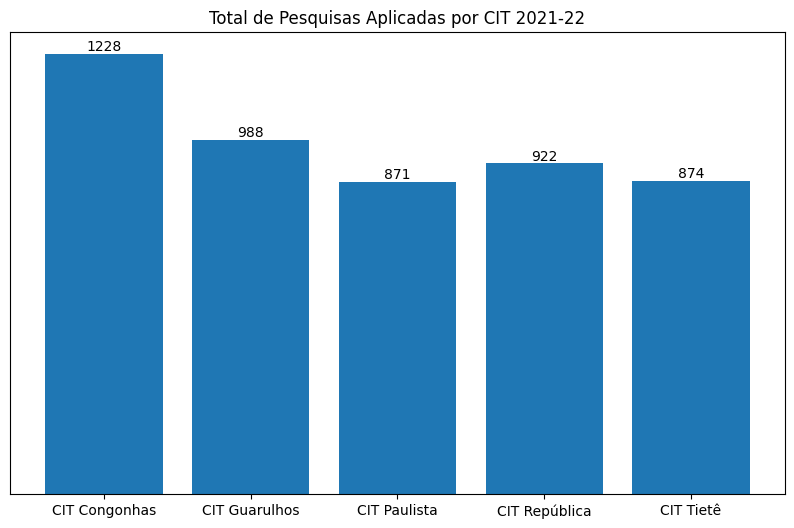

In [3]:
# TABELA DE FREQUÊNCIAS E GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR CIT ENTRE 2021 E 2022

# Tabela de Frequências variável CIT
tabela_frequencias = dados['CIT'].value_counts().reset_index()
tabela_frequencias.columns = ['CIT', 'Frequência']

# Frequências Relativas em porcentagem
total_registros = len(dados)
tabela_frequencias['Frequência Relativa (%)'] = (tabela_frequencias['Frequência'] / total_registros) * 100

# Frequências Cumulativas
tabela_frequencias = tabela_frequencias.sort_values(by='CIT')
tabela_frequencias['Frequência Cumulativa'] = tabela_frequencias['Frequência'].cumsum()

# Estatísticas adicionais
estatisticas = dados['CIT'].describe()

# Exibir tabelas
print("Tabela de Frequências:")
print(tabela_frequencias)

print("\nEstatísticas:")
print(estatisticas)

# Gráfico de barras para a tabela de frequências
plt.figure(figsize=(10, 6))
bars = plt.bar(tabela_frequencias['CIT'], tabela_frequencias['Frequência'])

# Adiciona os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Remove as legendas dos eixos x e y
plt.xticks(ticks=tabela_frequencias['CIT'], labels=tabela_frequencias['CIT'])
plt.yticks([])

plt.title('Total de Pesquisas Aplicadas por CIT 2021-22')
plt.show()


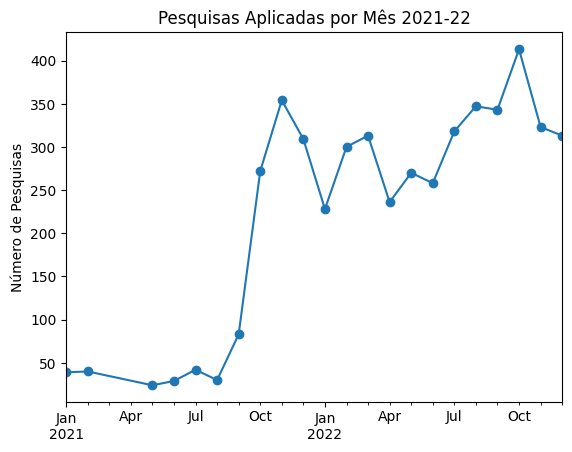

In [4]:
# GRÁFICO DE LINHA DO TOTAL DE PESQUISAS APLICADAS POR MÊS

# Converta a coluna 'Carimbo de data/hora' para o formato datetime
dados['Carimbo de data/hora'] = pd.to_datetime(dados['Carimbo de data/hora'])

# Crie uma coluna de Mês
dados['Mes'] = dados['Carimbo de data/hora'].dt.to_period('M')

# Conte o número de ocorrências para cada mês
contagem_por_mes = dados['Mes'].value_counts().sort_index()

# Crie o gráfico de linha
contagem_por_mes.plot(kind='line', marker='o')

# Adicione rótulos e título ao gráfico
plt.xlabel('')
plt.ylabel('Número de Pesquisas')
plt.title('Pesquisas Aplicadas por Mês 2021-22')

# Exiba o gráfico
plt.show()

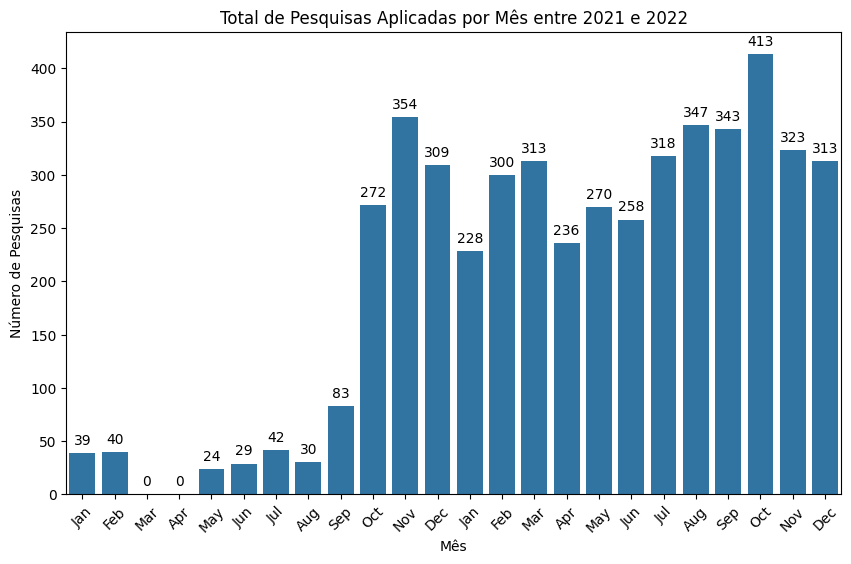

In [5]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR MÊS

# Converta a coluna 'Carimbo de data/hora' para o formato datetime
dados['Carimbo de data/hora'] = pd.to_datetime(dados['Carimbo de data/hora'])

# Crie uma coluna de Mês
dados['Mes'] = dados['Carimbo de data/hora'].dt.to_period('M')

# Conte o número de ocorrências para cada mês, incluindo todos os meses possíveis
contagem_por_mes = dados['Mes'].value_counts().sort_index().reindex(pd.period_range(dados['Mes'].min(), dados['Mes'].max(), freq='M'), fill_value=0)

# Crie o gráfico de barras com os valores totais
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=contagem_por_mes.index.astype(str), y=contagem_por_mes.values)

# Adicione os valores totais no topo das barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

# Ajuste as legendas para mostrar apenas os nomes dos meses
plt.xticks(range(len(contagem_por_mes.index)), contagem_por_mes.index.strftime('%b'), rotation=45)

# Adicione rótulos e título ao gráfico
plt.xlabel('Mês')
plt.ylabel('Número de Pesquisas')
plt.title('Total de Pesquisas Aplicadas por Mês entre 2021 e 2022')

# Exiba o gráfico
plt.show()



<Figure size 1200x600 with 0 Axes>

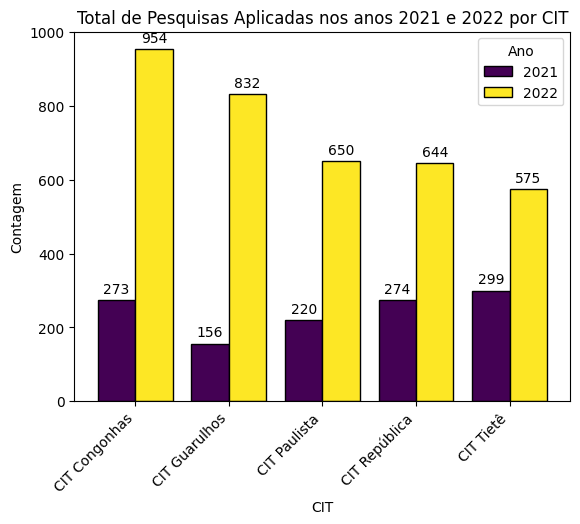

In [6]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR ANO, POR CIT.

# Converta a coluna 'Data' para o formato de data
dados['Data'] = pd.to_datetime(dados['Data'], format='%Y-%m-%d %H:%M:%S')

# Desconsiderando os zeros no final do horário
dados['Data'] = dados['Data'].dt.floor('D')

# Filtrando dados para incluir apenas 2021 e 2022
dados_filtrados = dados[(dados['Data'].dt.year == 2021) | (dados['Data'].dt.year == 2022)]

# Criando um DataFrame pivotado para ter os anos como colunas
pivotado = dados_filtrados.pivot_table(index='CIT', columns=dados_filtrados['Data'].dt.year, aggfunc='size', fill_value=0)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
ax = pivotado.plot(kind='bar', width=0.8, colormap='viridis', edgecolor='black')

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Total de Pesquisas Aplicadas nos anos 2021 e 2022 por CIT')
plt.xlabel('CIT')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.legend(title='Ano', labels=['2021', '2022'])
plt.show()



In [7]:
# Renomear a 6ª coluna 3. País de Residência/Pais de residencia/ Country of residence para 'pais de residencia'
dados.rename(columns={dados.columns[5]: 'pais de residencia'}, inplace=True)

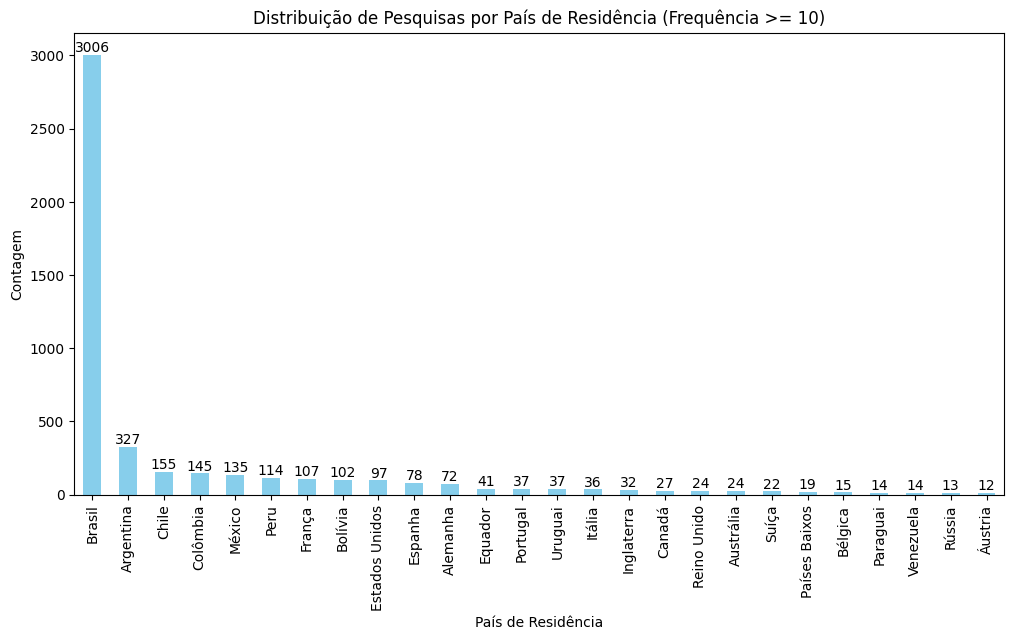

In [12]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS APLICADAS POR PAÍS DE RESIDÊNCIA, CONSIDERANDO VALORES MAIORES DO QUE 10.

# Contagem de valores para a variável 'pais de residencia'
contagem_paises = dados['pais de residencia'].value_counts()

# Filtrar para incluir apenas valores maiores ou iguais a 10
contagem_paises_filtrada = contagem_paises[contagem_paises >= 10]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_paises_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_paises_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribuição de Pesquisas por País de Residência (Frequência >= 10)')
plt.xlabel('País de Residência')
plt.ylabel('Contagem')
plt.show()


In [13]:
# Renomear a 10ª coluna para '4. Estado de Residência/Provincia de Residencia/State of residence'
dados.rename(columns={dados.columns[9]: 'estado de residencia'}, inplace=True)

# Renomear a 11ª coluna para '5. Cidade de Residência/ciudad de residencia/city of residence'
dados.rename(columns={dados.columns[10]: 'cidade de residencia'}, inplace=True)

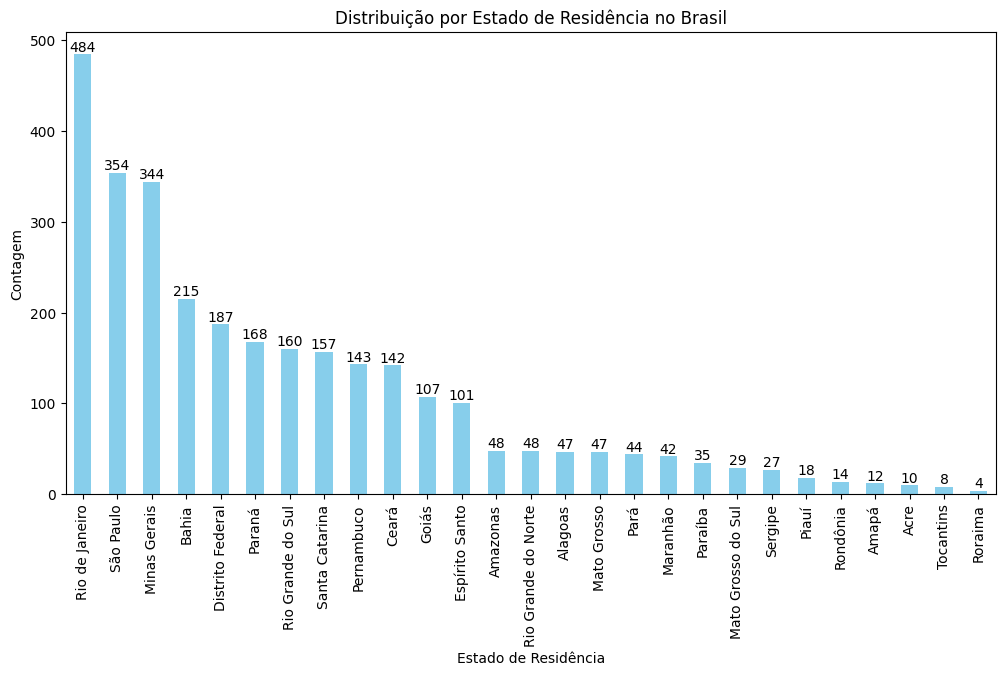

In [14]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS POR ESTADO DE RESIDÊNCIA NO BRASIL

# Filtrar o DataFrame para incluir apenas as linhas onde 'pais de residencia' é igual a 'Brasil'
dados_brasil = dados[dados['pais de residencia'] == 'Brasil']

# Contagem de valores para a variável 'estado de residencia' no subconjunto Brasil
contagem_estados = dados_brasil['estado de residencia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_estados.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_estados):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribuição por Estado de Residência no Brasil')
plt.xlabel('Estado de Residência')
plt.ylabel('Contagem')
plt.show()


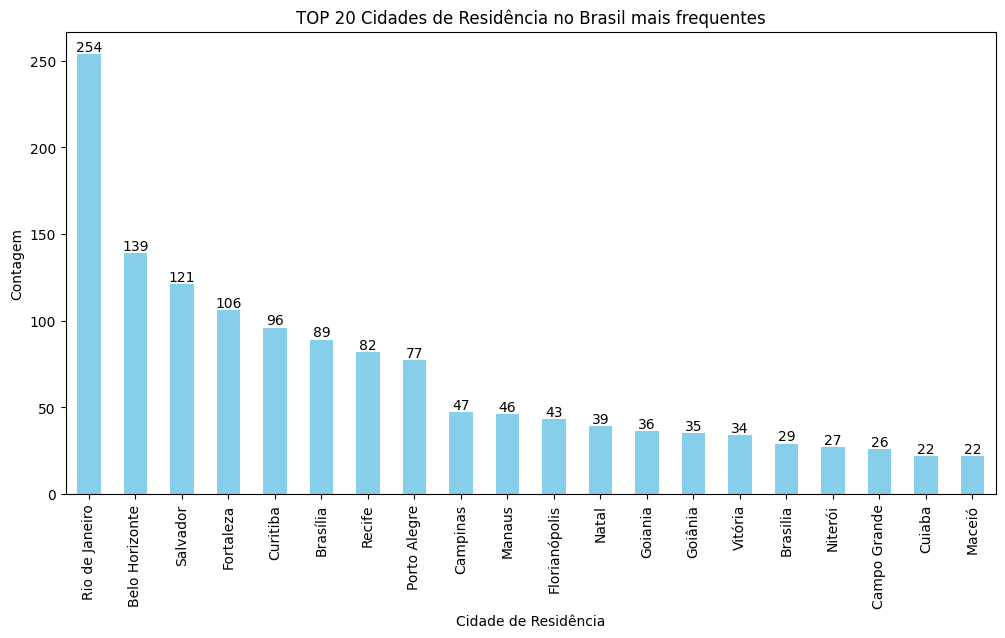

In [20]:
# GRÁFICO DE BARRAS DO TOTAL DE PESQUISAS POR CIDADE DE RESIDÊNCIA NO BRASIL, CONSIDERANDO AS TOP 20 CIDADES.

# Filtrar o DataFrame para incluir apenas as linhas onde 'pais de residencia' é igual a 'Brasil'
dados_brasil = dados[dados['pais de residencia'] == 'Brasil']

# Contagem de valores para a variável 'cidade de residencia' no subconjunto Brasil
contagem_cidades = dados_brasil['cidade de residencia'].value_counts()

# Selecionar os 20 maiores valores
contagem_cidades_top20 = contagem_cidades.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_cidades_top20.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_cidades_top20):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('TOP 20 Cidades de Residência no Brasil mais frequentes')
plt.xlabel('Cidade de Residência')
plt.ylabel('Contagem')
plt.show()


In [25]:
# Renomear a 13ª coluna para 'meio transporte'
dados.rename(columns={dados.columns[12]: 'meio transporte'}, inplace=True)

# Renomear a 14ª coluna para 'motivo predominante'
dados.rename(columns={dados.columns[13]: 'motivo predominante'}, inplace=True)

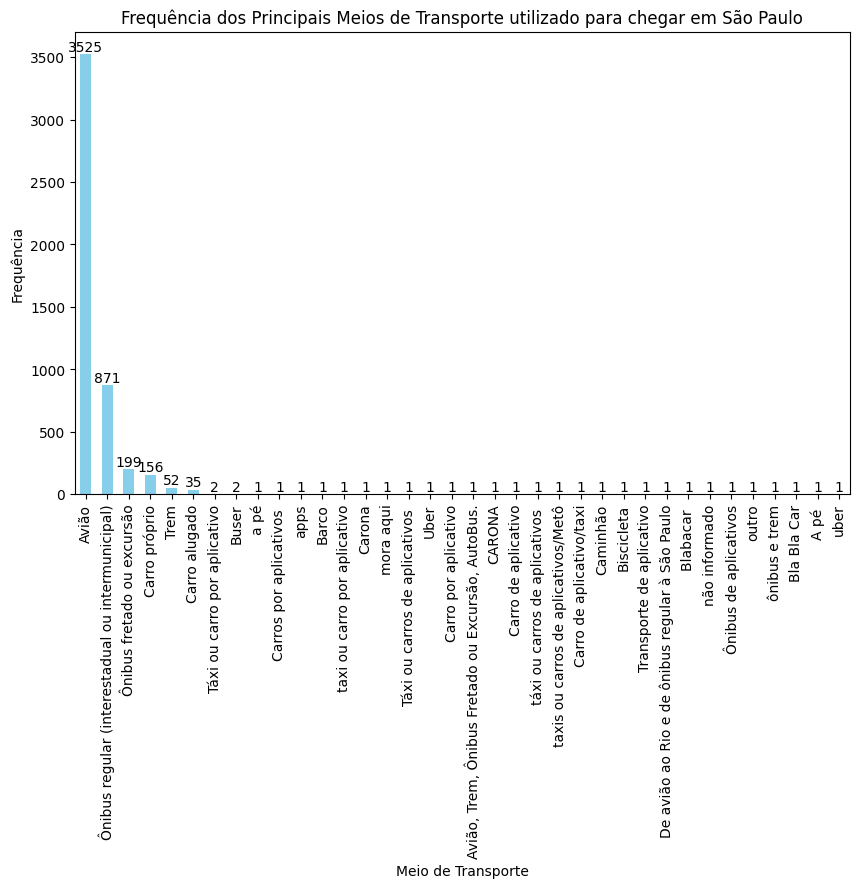

In [36]:
# GRÁFICO DE BARRAS DA VARIÁVEL MEIO DE TRANSPORTE UTILIZADO PARA CHEGAR EM SP

# Contagem dos meios de transporte
contagem_transportes = dados['meio transporte'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_transportes.plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(contagem_transportes):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Frequência dos Principais Meios de Transporte utilizado para chegar em São Paulo')
plt.xlabel('Meio de Transporte')
plt.ylabel('Frequência')
plt.show()

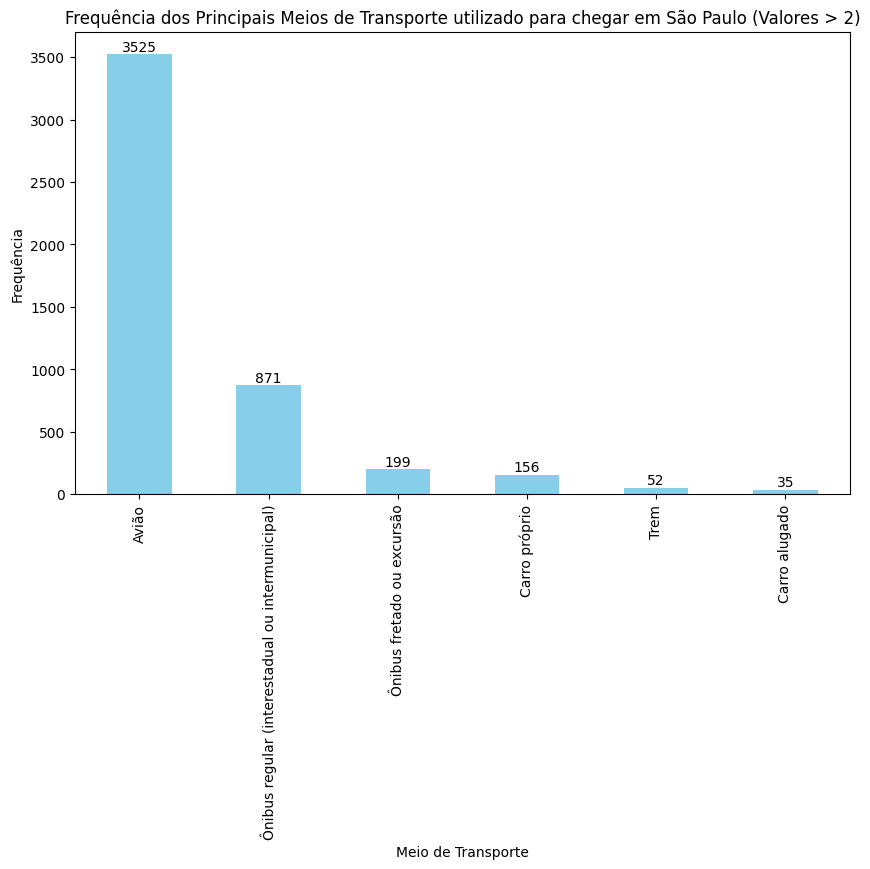

In [37]:
# Contagem dos meios de transporte
contagem_transportes = dados['meio transporte'].value_counts()

# Filtrar para incluir apenas valores maiores que 2
contagem_transportes_filtrada = contagem_transportes[contagem_transportes > 2].dropna()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_transportes_filtrada.plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(contagem_transportes_filtrada):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Frequência dos Principais Meios de Transporte utilizado para chegar em São Paulo (Valores > 2)')
plt.xlabel('Meio de Transporte')
plt.ylabel('Frequência')
plt.show()


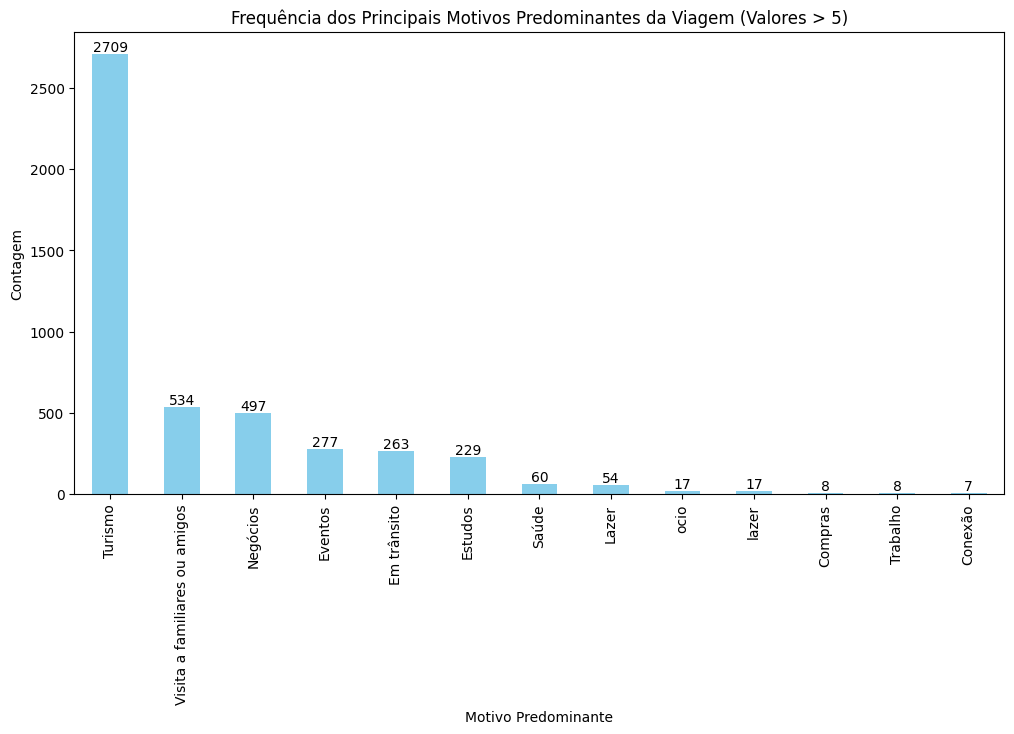

In [ ]:
# GRÁFICO DE BARRAS DO MOTIVO PREDOMINANTE DA VIAGEM A SP, CONSIDERANDO VALORES MAIOR DO QUE 5

# Filtrar o DataFrame para incluir apenas as linhas onde a contagem de motivo predominante é maior do que 5
contagem_motivo_filtrada = contagem_motivo[contagem_motivo > 5]

# Criar o gráfico de barras com os valores filtrados
plt.figure(figsize=(12, 6))
ax = contagem_motivo_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_motivo_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Motivos Predominantes da Viagem (Valores > 5)')
plt.xlabel('Motivo Predominante')
plt.ylabel('Contagem')
plt.show()


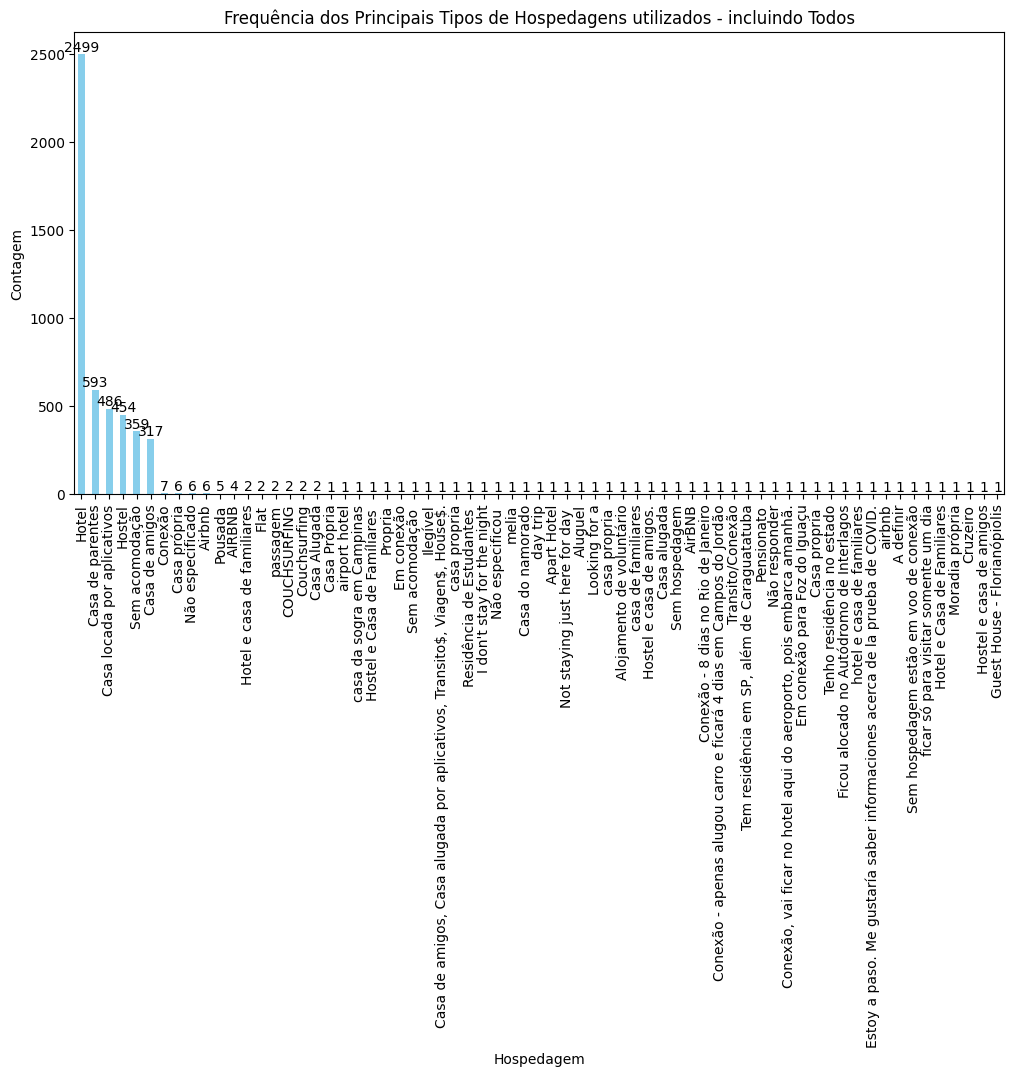

In [39]:
# GRÁFICO DE BARRAS DO MEIO DE HOSPEDAGEM UTILIZADO EM SÃO PAULO

# Renomear a 19ª coluna para 'hospedagem'
dados.rename(columns={dados.columns[18]: 'hospedagem'}, inplace=True)

# Contagem de valores para a variável 'hospedagem'
contagem_hospedagem = dados['hospedagem'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_hospedagem.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_hospedagem):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Tipos de Hospedagens utilizados - incluindo Todos')
plt.xlabel('Hospedagem')
plt.ylabel('Contagem')
plt.show()


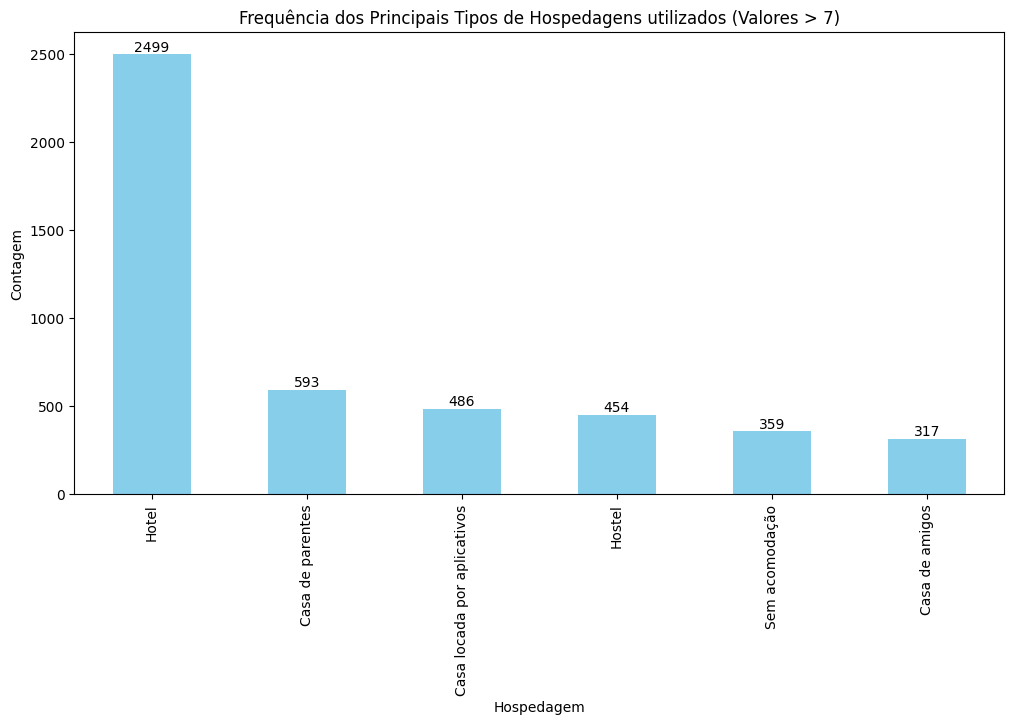

In [40]:
# GRÁFICO DE BARRAS DO MEIO DE HOSPEDAGEM UTILIZADO EM SP, CONSIDERANDO VALORES MAIORES DO QUE 7

# Contagem de valores para a variável 'hospedagem'
contagem_hospedagem = dados['hospedagem'].value_counts()

# Filtrar o DataFrame para incluir apenas as linhas onde a contagem de hospedagem é maior do que 2
contagem_hospedagem_filtrada = contagem_hospedagem[contagem_hospedagem > 7]

# Criar o gráfico de barras com os valores filtrados
plt.figure(figsize=(12, 6))
ax = contagem_hospedagem_filtrada.plot(kind='bar', color='skyblue')

# Adicionar rótulos para cada barra
for i, value in enumerate(contagem_hospedagem_filtrada):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Frequência dos Principais Tipos de Hospedagens utilizados (Valores > 7)')
plt.xlabel('Hospedagem')
plt.ylabel('Contagem')
plt.show()


In [41]:
# Renomear a 309ª coluna para 'avalicao atendimento'
dados.rename(columns={dados.columns[308]: 'avalicao atendimento'}, inplace=True)

# Renomear a 310ª coluna para 'avalicao servicos'
dados.rename(columns={dados.columns[309]: 'avalicao servicos'}, inplace=True)

# Renomear a 311ª coluna para 'avalicao localizacao'
dados.rename(columns={dados.columns[310]: 'avalicao localizacao'}, inplace=True)

# Renomear a 312ª coluna para 'avalicao materiais'
dados.rename(columns={dados.columns[311]: 'avalicao materiais'}, inplace=True)

# Renomear a 313ª coluna para 'comentarios'
dados.rename(columns={dados.columns[312]: 'comentarios'}, inplace=True)

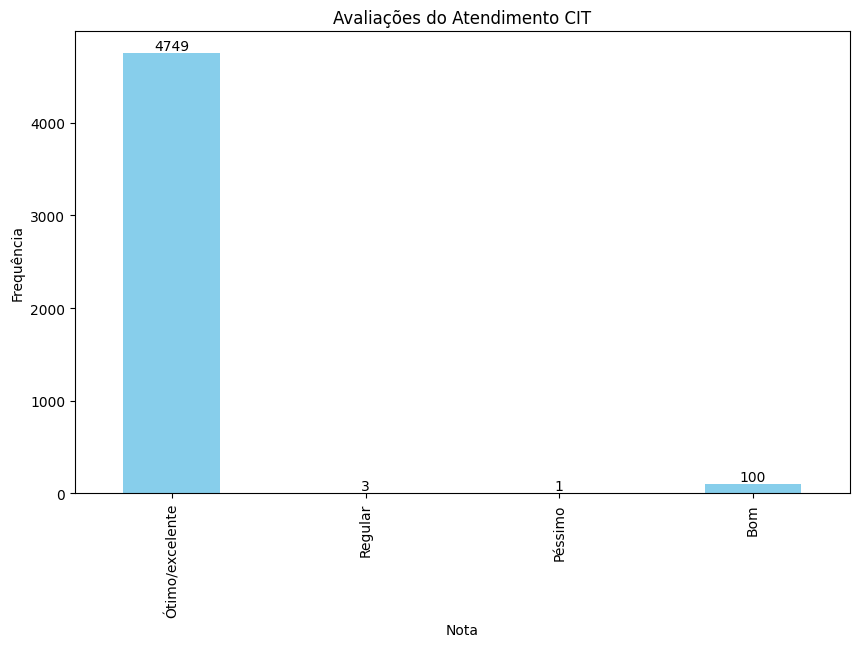

In [42]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DOS ATENDIMENTOS CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao atendimento'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao atendimento'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações do Atendimento CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()


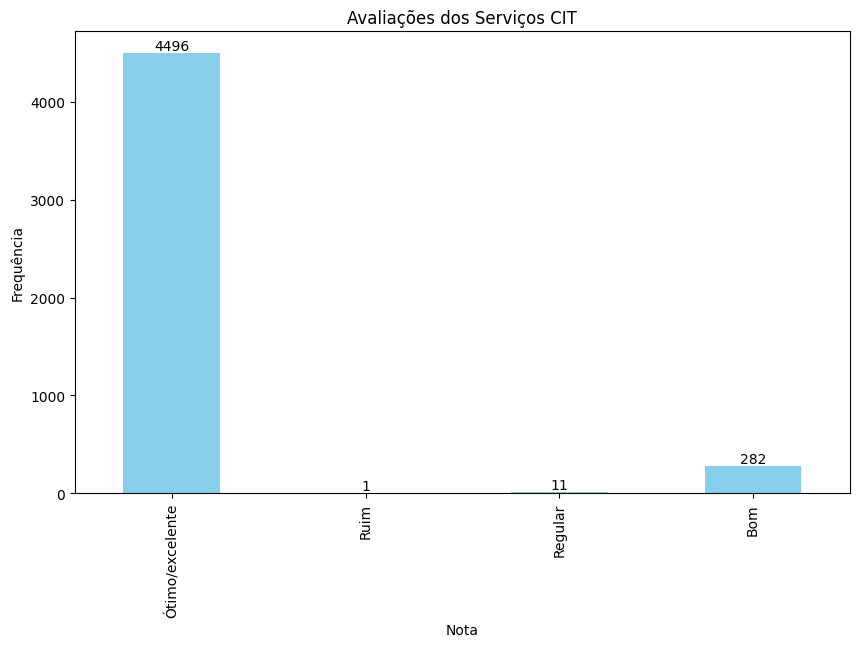

In [43]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DOS SERVIÇOS CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao servicos'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao servicos'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações dos Serviços CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

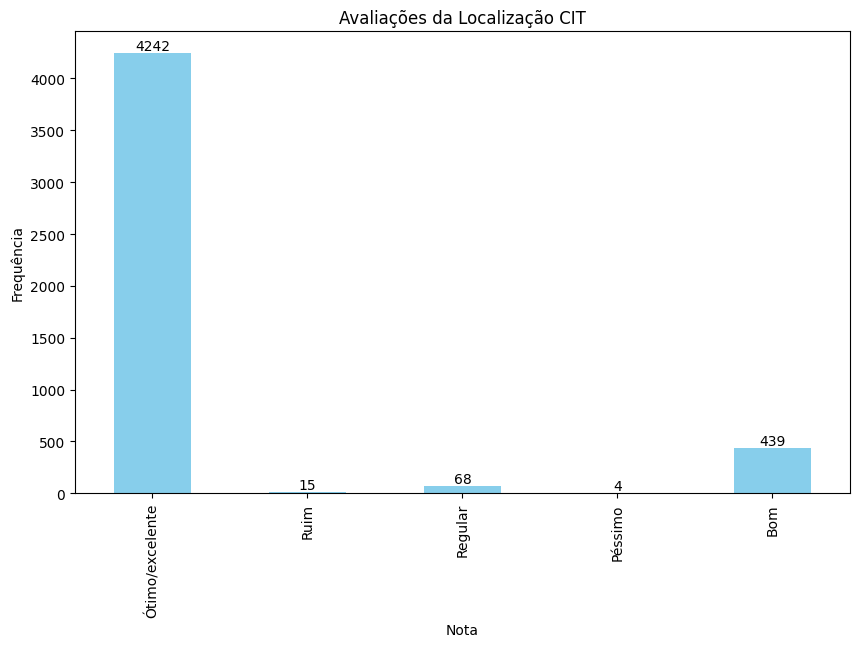

In [44]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DA LOCALIZAÇÃO CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao localizacao'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao localizacao'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações da Localização CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

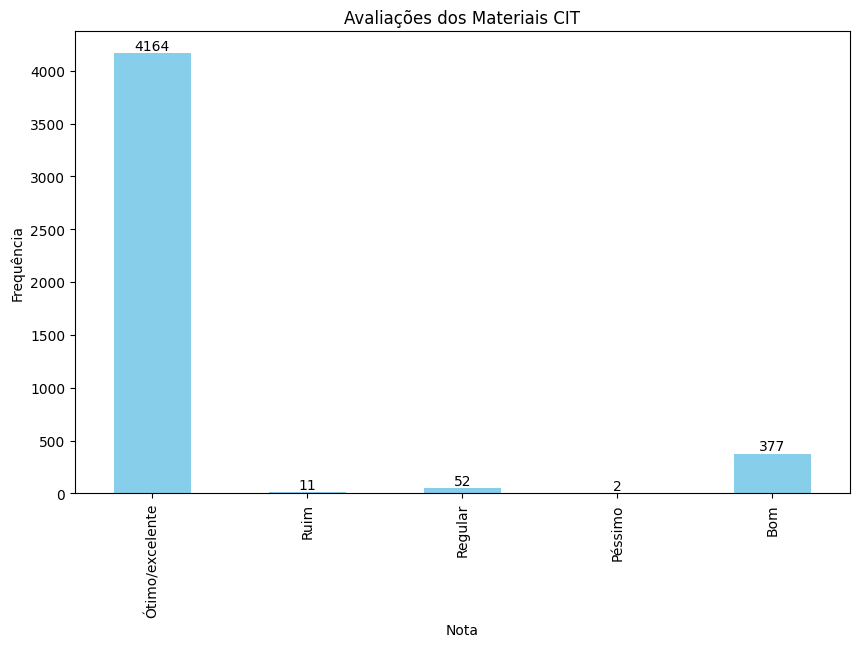

In [45]:
# GRÁFICO BARRAS DAS AVALIAÇÕES DOS MATERIAIS CITS

# Criando o gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = dados['avalicao materiais'].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue')

# Adicionando rótulos aos valores nas barras
for i, v in enumerate(dados['avalicao materiais'].value_counts().sort_index(ascending=False)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Avaliações dos Materiais CIT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


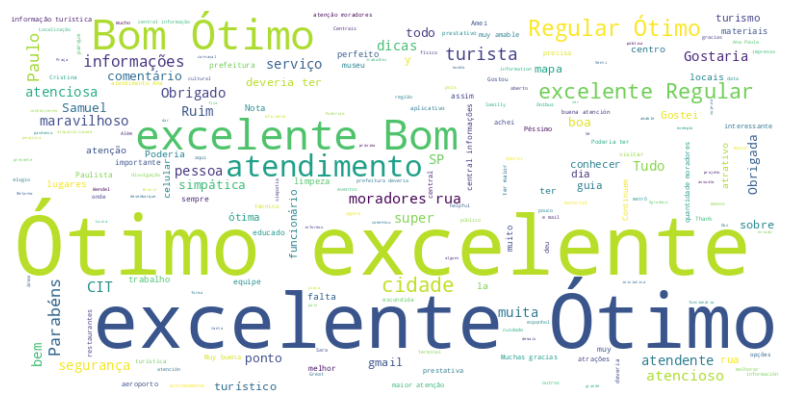

In [46]:
#NUVEM DE PALAVRAS DA VARIÁVEL COMENTÁRIOS

import nltk

# Baixar o recurso "punkt"
nltk.download('punkt')

import nltk

# Baixar o recurso "stopwords"
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras
palavras = word_tokenize(texto_completo)

# Remover stop words
stop_words = set(stopwords.words('portuguese'))  # Pode ser 'english' se for em inglês
palavras_sem_stop_words = [palavra for palavra in palavras if palavra.lower() not in stop_words]

# Criar uma string a partir das palavras sem stop words
texto_sem_stop_words = ' '.join(palavras_sem_stop_words)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stop_words)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

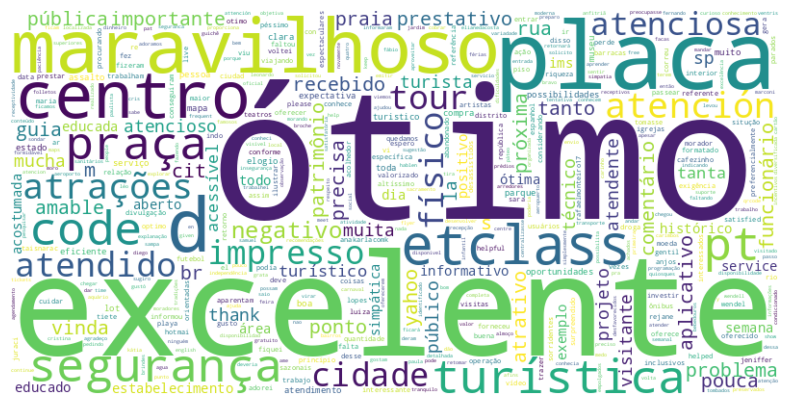

In [47]:
# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras
palavras = word_tokenize(texto_completo)

# Remover stop words
stop_words = set(stopwords.words('portuguese'))
palavras_sem_stop_words = [palavra.lower() for palavra in palavras if palavra.lower() not in stop_words]

# Garantir que as palavras específicas apareçam apenas uma vez
palavras_unicas = set(palavras_sem_stop_words)
palavras_unicas.update(['excelente', 'ótimo', 'bom'])

# Criar uma string a partir das palavras sem stop words
texto_sem_stop_words = ' '.join(palavras_unicas)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=len(palavras_unicas)).generate(texto_sem_stop_words)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

              Palavra  Frequência
1271  ótimo/excelente        3122
137               bom         323
98        atendimento         120
1272          regular          70
38                 ``          62
115         excelente          61
47                 ''          59
11             cidade          49
142             ótimo          38
183       informações          34


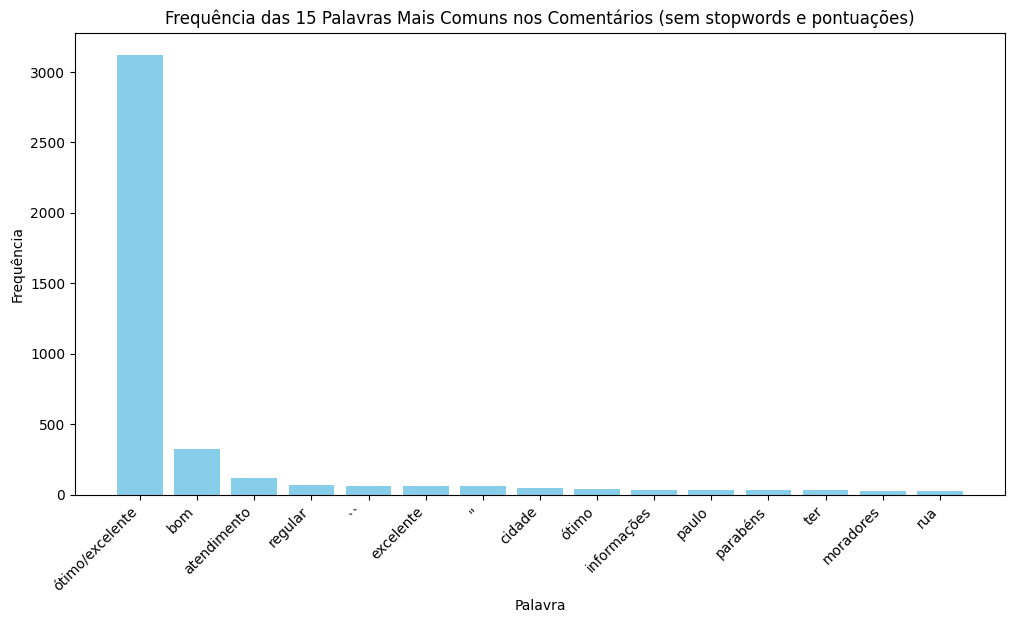

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from collections import Counter

# Supondo que 'dados' é o seu DataFrame e 'comentarios' é a coluna de comentários
comentarios = dados['comentarios']

# Remover valores NaN
comentarios = comentarios.dropna()

# Juntar todos os comentários em uma única string
texto_completo = ' '.join(comentarios)

# Tokenizar as palavras e remover pontuações
palavras = [palavra.lower() for palavra in word_tokenize(texto_completo) if palavra.lower() not in set(punctuation)]

# Remover stop words
stop_words = set(stopwords.words('portuguese'))
palavras_sem_stop_words = [palavra for palavra in palavras if palavra not in stop_words]

# Calcular as frequências das palavras
frequencias = Counter(palavras_sem_stop_words)

# Criar um DataFrame com as palavras e suas frequências
df_frequencias = pd.DataFrame(list(frequencias.items()), columns=['Palavra', 'Frequência'])
df_frequencias = df_frequencias.sort_values(by='Frequência', ascending=False)

# Exibir as 10 palavras mais frequentes
print(df_frequencias.head(10))

# Criar um gráfico de barras com as 15 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(df_frequencias['Palavra'][:15], df_frequencias['Frequência'][:15], color='skyblue')
plt.title('Frequência das 15 Palavras Mais Comuns nos Comentários (sem stopwords e pontuações)')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()